# students performance preprocessing

## Required libraries

In [30]:
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

import warnings 
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
data = pd.read_csv('StudentsPerformance.csv')

### Explore Data

In [32]:
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average,performance
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,good
1,female,group C,some college,standard,completed,69,90,88,82.33,good
2,female,group B,master's degree,standard,none,90,95,93,92.67,good
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,not_good
4,male,group C,some college,standard,none,76,78,75,76.33,good


In [33]:

print('Total no. of samples =', data.shape[0])
print('Total no. of features =', data.shape[1])
print('Total no. of elements =', data.size)

Total no. of samples = 1000
Total no. of features = 10
Total no. of elements = 10000


In [34]:
data['performance'].isnull().sum()
data['performance'].fillna(value = 0, inplace = True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   average                      1000 non-null   float64
 9   performance                  1000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 78.2+ KB


In [36]:
data.describe(include = 'all')

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average,performance
count,1000,1000,1000,1000,1000,1000.00,1000.00,1000.00,1000.00,1000
unique,2,5,6,2,2,NaN,NaN,NaN,NaN,2
top,female,group C,some college,standard,none,NaN,NaN,NaN,NaN,good
freq,518,319,226,645,642,NaN,NaN,NaN,NaN,709
mean,NaN,NaN,NaN,NaN,NaN,66.09,69.17,68.05,67.77,NaN
std,NaN,NaN,NaN,NaN,NaN,15.16,14.60,15.20,14.26,NaN
min,NaN,NaN,NaN,NaN,NaN,0.00,17.00,10.00,9.00,NaN
25%,NaN,NaN,NaN,NaN,NaN,57.00,59.00,57.75,58.33,NaN
50%,NaN,NaN,NaN,NaN,NaN,66.00,70.00,69.00,68.33,NaN
75%,NaN,NaN,NaN,NaN,NaN,77.00,79.00,79.00,77.67,NaN


### DATA VISUALIZATION

## Categorize data into different types:

In [37]:
categorical_variables = []
numerical_variables = []
for feature in data.columns:
    if data[feature].dtypes == 'O':
        categorical_variables.append(feature)
    else:
        numerical_variables.append(feature)

In [38]:
categorical_variables

['gender',
 'race/ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'performance']

### Plotting the distribution of Categorical Variables:

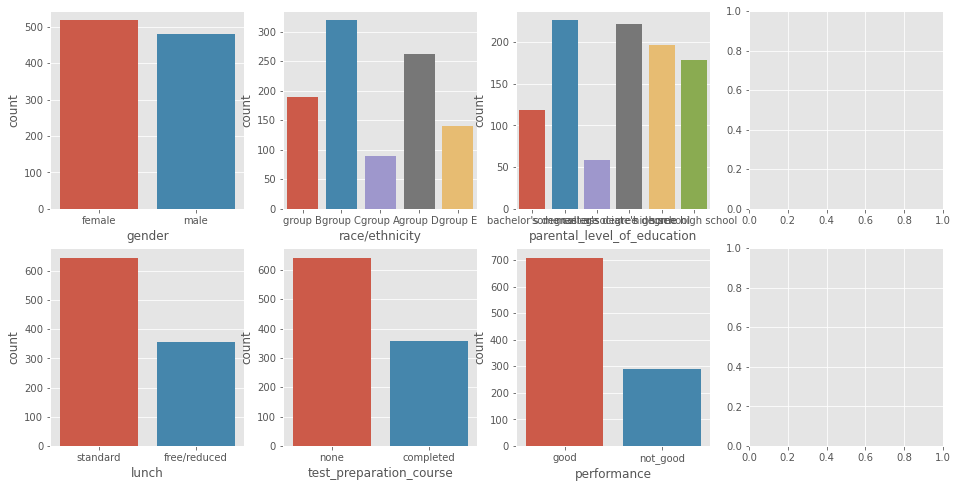

In [39]:
fig, ax = plt.subplots(2,4,figsize=(16,8))
sns.countplot('gender', data=data, ax=ax[0][0])
sns.countplot('race/ethnicity', data=data, ax=ax[0][1])
sns.countplot('parental_level_of_education', data=data, ax=ax[0][2])
sns.countplot('lunch', data=data, ax=ax[1][0])
sns.countplot('test_preparation_course', data=data, ax=ax[1][1])
sns.countplot('performance', data=data, ax=ax[1][2])

plt.show()

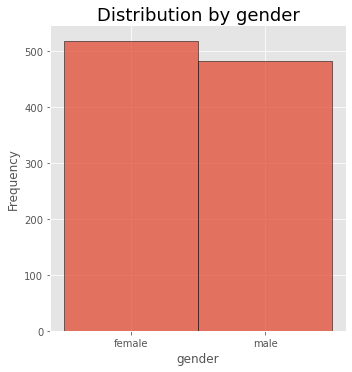

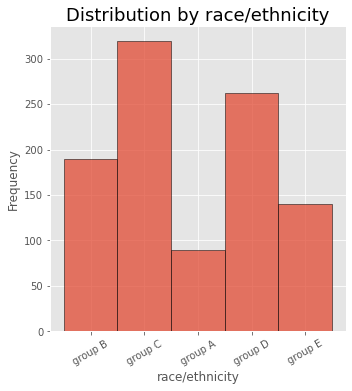

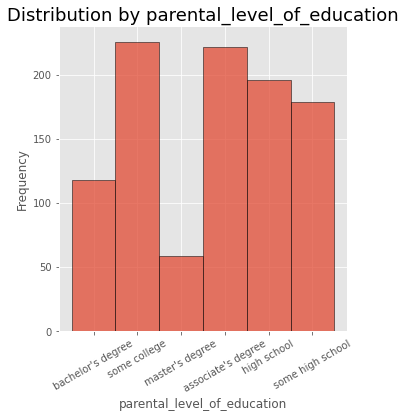

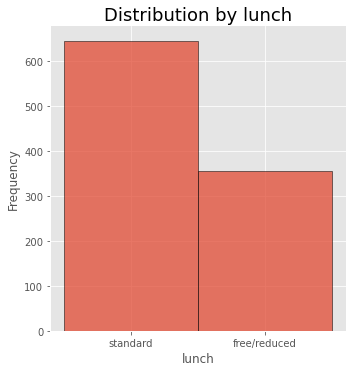

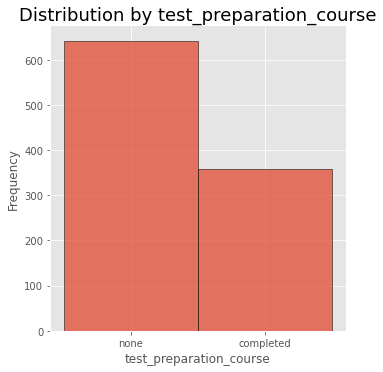

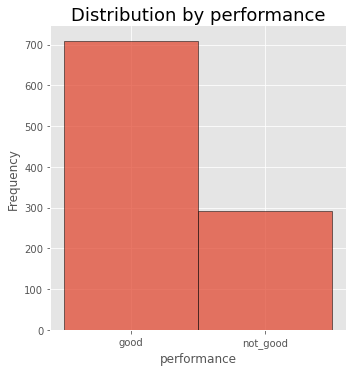

In [40]:
for feature in categorical_variables:
    sns.displot(data = data, x = feature, kde = False, edgecolor='black')
    plt.style.use('ggplot')
    plt.title('Distribution by' + ' ' + feature, size = 18)
    plt.xlabel(feature, size = 12)
    plt.ylabel('Frequency', size = 12)
    if data[feature].nunique() > 4:
        plt.xticks(rotation = 30)

## Plotting the distribution of Numerical Variables:

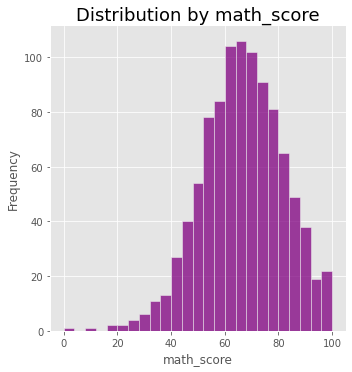

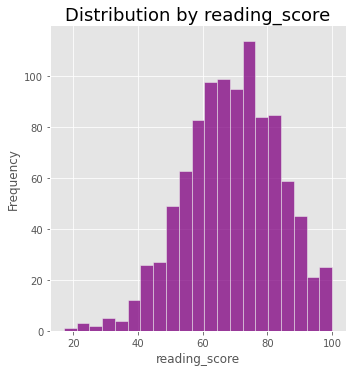

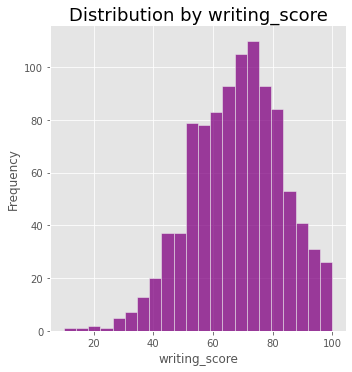

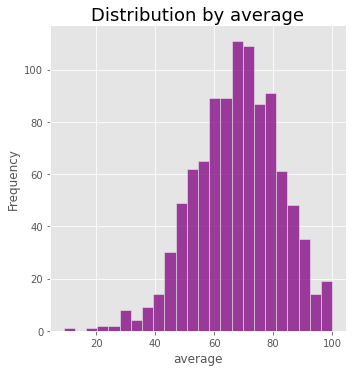

In [41]:
for feature in numerical_variables:
    sns.displot(x = feature, data = data, color = 'purple', kde = False)
    plt.style.use('ggplot')
    plt.title('Distribution by' + ' ' + feature, size = 18)
    plt.xlabel(feature, size = 12)
    plt.ylabel('Frequency', size = 12)

## drop the unwanted columns 

In [42]:

data.drop(['race/ethnicity','test_preparation_course'], axis = 1, inplace = True)

## rename the columns

In [43]:
data.rename(columns = {'parental_level_of_education':'level_of_education'}, inplace = True)

## value_counts()

In [44]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [45]:
data.loc[data["gender"] == "female", "gender"] = 0
data.loc[data["gender"] == "male", "gender"] = 1

In [46]:
data['level_of_education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: level_of_education, dtype: int64

In [47]:
data["level_of_education"] = data["level_of_education"].replace(["some college"], "bachelor's degree")
data["level_of_education"] = data["level_of_education"].replace(["high school"], "bachelor's degree")
data["level_of_education"] = data["level_of_education"].replace(["associate's degree"], "master's degree")
data["level_of_education"] = data["level_of_education"].replace(["some high school"], "master's degree")

In [48]:
data.loc[data["level_of_education"] == "bachelor's degree", "level_of_education"] =0
data.loc[data["level_of_education"] == "master's degree", "level_of_education"] =1

In [49]:
data['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [50]:
data.loc[data["lunch"] == "standard", "lunch"] = 0
data.loc[data["lunch"] == "free/reduced", "lunch"] =1

In [51]:
data.loc[data['performance'] == 'good', 'performance'] = 0 
data.loc[data['performance'] == 'not_good', 'performance'] = 1

In [52]:
data.head()

,gender,level_of_education,lunch,math_score,reading_score,writing_score,average,performance
0,0,0,0,72,72,74,72.67,0
1,0,0,0,69,90,88,82.33,0
2,0,1,0,90,95,93,92.67,0
3,1,1,1,47,57,44,49.33,1
4,1,0,0,76,78,75,76.33,0


In [53]:
data.to_csv('pre_process_students_performance.csv', header=True, index=False)